In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statistics as st
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<function matplotlib.pyplot.show(close=None, block=None)>

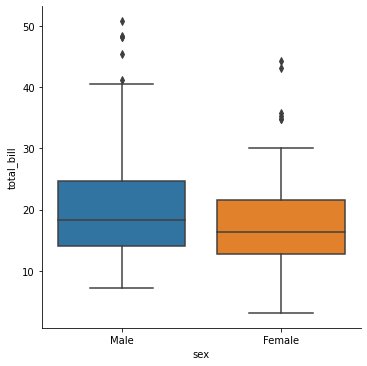

In [2]:
#H0=Average tips from male=Average tips from female
#H1=Average tips from Male != Averge tips from female
sns.catplot(data=df,x="sex",y="total_bill",kind="box",legend=True,margin_titles=True)
plt.show
            

In [3]:
#Levenes Test
m_tips=df.tip[df["sex"]=="Male"]
f_tips=df.tip[df["sex"]=="Female"]
m_tips=m_tips.sample(87,random_state=42)
print(m_tips)
print("*"*60)
print(f_tips)


194    4.00
60     3.21
207    3.00
216    3.00
175    3.11
       ... 
204    4.00
62     1.98
177    2.00
83     5.00
99     1.50
Name: tip, Length: 87, dtype: float64
************************************************************
0      1.01
4      3.61
11     5.00
14     3.02
16     1.67
       ... 
226    2.00
229    2.88
238    4.67
240    2.00
243    3.00
Name: tip, Length: 87, dtype: float64


In [4]:
x=st.variance(m_tips)
y=st.variance(f_tips)
print(x)
y

1.8815738572574179


1.3444275060144346

In [5]:
#Levenes Test to find out if variance is equal
stats.levene(m_tips,f_tips)
#since los is 5% and pvalue is 29% we do not reject H0, therefore, Variance is equal

LeveneResult(statistic=1.5545676897427736, pvalue=0.21415761299201896)

ShapiroResult(statistic=0.9830676913261414, pvalue=0.3145478069782257)

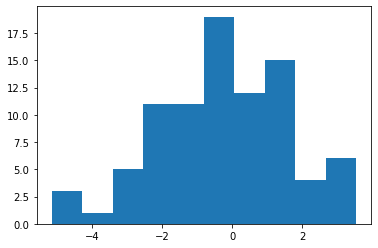

In [6]:
#Shapiro test to find if data follows Normal Distribution
diff=np.array(f_tips)-np.array(m_tips)
plt.hist(diff)
plt.show
stats.shapiro(diff)
#Since p value in shapiro Test is greater than LOS 5% then we do not reject H0, so, data follows normal distribution

In [7]:
stats.ttest_ind(m_tips,f_tips)
#since two sample t test shows a p value of 15% against los 5% we do not reject H0, therefore Average tips 
#from male=Average tips from female

Ttest_indResult(statistic=1.4128835161635294, pvalue=0.15949697347119488)

<function matplotlib.pyplot.show(close=None, block=None)>

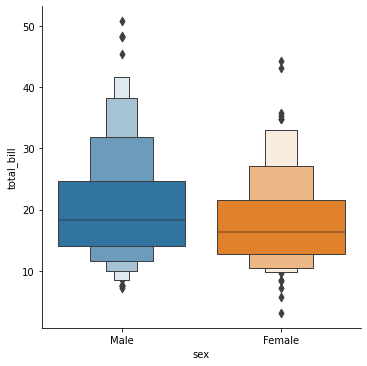

In [8]:
sns.catplot(data=df,x="sex",y="total_bill",kind="boxen")
plt.show
        

<function matplotlib.pyplot.show(close=None, block=None)>

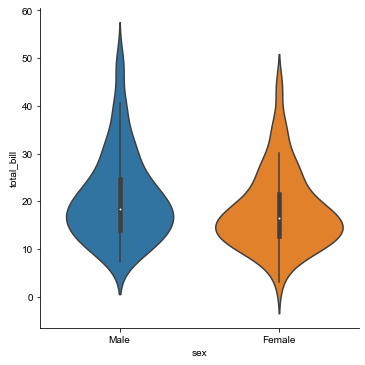

In [9]:
sns.catplot(data=df,x="sex",y="total_bill",kind="violin")
sns.set_theme(style="ticks")
plt.show
        

In [12]:
!pip install researchpy

In [13]:
import researchpy as rp


In [17]:
res=rp.ttest(m_tips,f_tips,equal_variances=True,paired=False)
res

(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0       tip   87.0  3.105517  1.371705  0.147062   2.813167  3.397867
 1       tip   87.0  2.833448  1.159495  0.124311   2.586326  3.080570
 2  combined  174.0  2.969483  1.273691  0.096558   2.778899  3.160067,
           Independent t-test   results
 0  Difference (tip - tip) =     0.2721
 1      Degrees of freedom =   172.0000
 2                       t =     1.4129
 3   Two side test p value =     0.1595
 4  Difference < 0 p value =     0.9203
 5  Difference > 0 p value =     0.0797
 6               Cohen's d =     0.2142
 7               Hedge's g =     0.2133
 8           Glass's delta =     0.1983
 9             Pearson's r =     0.1071)